# SparseEdges


## A bio-inspired sparse representation of edges in natural images


Table of content

* [What is the SparseEdges package?](#What-is-the-SparseEdges-package?) 
* [Installing](#Installing) 
* [testing one step](#testing-one-step)


What is the SparseEdges package?
================================

Our goal here is to build practical algorithms of sparse coding for computer vision.

The code is available @ https://github.com/bicv/SparseEdges

This class exploits the LogGabor package to provide with a sparse representation of edges in images.

This algorithm was presented in the following paper:

```bibtex
@inbook{Perrinet15bicv,
    title = {Sparse models},
    author = {Perrinet, Laurent U.},
    booktitle = {Biologically-inspired Computer Vision},
    chapter = {13},
    editor = {Keil, Matthias and Crist\'{o}bal, Gabriel and Perrinet, Laurent U.},
    publisher = {Wiley, New-York},
    year = {2015}
}
```



This package gives a python implementation.

Moreover, it gives additional tools to compute useful stistics in images; first- and second order statistics of co-occurences in images.
More information is available @ http://nbviewer.ipython.org/github/bicv/SparseEdges/blob/master/SparseEdges.ipynb
Tests for the packages are available @ http://nbviewer.ipython.org/github/bicv/SparseEdges/blob/master/test-SparseEdges.ipynb.

## Installing

To install the ``SparseEdges`` class, you would need the ``LogGabor`` class (multiscale filters) which itself depends on the ``SLIP`` class (the image processing tools).

    pip install git+https://github.com/bicv/SLIP.git
    pip install git+https://github.com/bicv/LogGabor.git 
    pip install git+https://github.com/bicv/SparseEdges.git
    

But before, you need th usual depndencies, such as numpy, matplotlib, pyprind and imageio:

    pip install -U numpy matplotlib pyprind imageio


[Back to top](#SparseEdges)

In [1]:
%cd -q probe
from __future__ import division, print_function
%matplotlib inline
import os
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(precision=4)#, suppress=True)

### Extracting edges on a sample image

We will show here how we can simply reconstruct an example image with the list of extracted edges overlaid.

First we define our object by loading default parameters from internet:

In [2]:
from SparseEdges import SparseEdges
mp = SparseEdges('https://raw.githubusercontent.com/bicv/SparseEdges/master/default_param.py')
print(mp.pe)

{'verbose': 0, 'N_image': None, 'seed': 42, 'N_X': 256, 'N_Y': 256, 'noise': 0.33, 'do_mask': True, 'mask_exponent': 3.0, 'do_whitening': True, 'white_name_database': 'kodakdb', 'white_n_learning': 0, 'white_N': 0.07, 'white_N_0': 0.0, 'white_f_0': 0.4, 'white_alpha': 1.4, 'white_steepness': 4.0, 'white_recompute': False, 'base_levels': 1.618, 'n_theta': 24, 'B_sf': 0.4, 'B_theta': 0.17453277777777776, 'N': 2048, 'MP_alpha': 0.7, 'd_width': 45.0, 'd_min': 0.5, 'd_max': 2.0, 'N_r': 6, 'N_Dtheta': 24, 'N_phi': 12, 'N_scale': 5, 'loglevel_max': 7, 'edge_mask': True, 'do_rank': False, 'scale_invariant': True, 'multiscale': True, 'kappa_phase': 0.0, 'weight_by_distance': True, 'svm_n_jobs': 1, 'svm_test_size': 0.2, 'N_svm_grid': 32, 'N_svm_cv': 50, 'C_range_begin': -5, 'C_range_end': 10.0, 'gamma_range_begin': -14, 'gamma_range_end': 3, 'svm_KL_m': 0.34, 'svm_tol': 0.001, 'svm_max_iter': -1, 'svm_log': False, 'svm_norm': False, 'figpath': 'results', 'do_edgedir': False, 'edgefigpath': 'resu

At this point, we can change these parameters, by instance by using ``2048`` edges and a different value for the $\alpha$ value in matching pursuit:

In [3]:
mp.pe.N = 16
mp.pe.MP_alpha = .9

We can now load an image and make sure to set the framework to the appropriate size:

In [4]:
# defining input image
name = 'example'
image = mp.imread('https://raw.githubusercontent.com/bicv/SparseEdges/master/database/lena256.png')
mp.set_size(image)

... then, we can initialize the algorithm and normalize the image:

In [5]:
mp.init()
image = mp.normalize(image, center=True)
print(image.mean(), image.std())

-0.04846426156850979 0.44376005927405815


Then, it is easy to run matching pursuit on that image (or load a cached file with the results):

In [6]:
print(os.path.join(mp.pe.matpath, name + '.npy'))

cache_dir/example.npy


In [7]:
matname = os.path.join(mp.pe.matpath, name + '.npy')
try:
    edges = np.load(matname)
except Exception:
    edges, C_res = mp.run_mp(image, verbose=True)
    np.save(matname, edges)    

Let's summarize that in one script:

In [8]:
%%writefile experiment_example.py
#! /usr/bin/env python
# -*- coding: utf8 -*-
from __future__ import division, print_function
"""

An example MP run.

To run:
$ python experiment_example.py 

To remove cache:
$ rm -fr **/example*

"""
__author__ = "(c) Laurent Perrinet INT - CNRS"


import numpy as np
from SparseEdges import SparseEdges
mp = SparseEdges('https://raw.githubusercontent.com/bicv/SparseEdges/master/default_param.py')
mp.N = 128

image = mp.imread('https://raw.githubusercontent.com/bicv/SparseEdges/master/database/lena256.png')

name = 'example'
white = mp.pipeline(image, do_whitening=True)

import os
matname = os.path.join(mp.pe.matpath, name + '.npy')
try:
    edges = np.load(matname)
except Exception:
    edges, C_res = mp.run_mp(white, verbose=False)
    np.save(matname, edges)    


Overwriting experiment_example.py


In [9]:
%run experiment_example.py

Edge  0 / 2048  - Max activity  :  1.180  phase=  101.126  deg,  @  (152, 104, 19, 3)
Edge  1 / 2048  - Max activity  :  1.066  phase=  -9.115  deg,  @  (173, 88, 18, 2)
Edge  2 / 2048  - Max activity  :  1.028  phase=  -0.030  deg,  @  (122, 183, 0, 3)
Edge  3 / 2048  - Max activity  :  0.972  phase=  81.275  deg,  @  (151, 184, 0, 3)
Edge  4 / 2048  - Max activity  :  0.929  phase=  77.921  deg,  @  (94, 196, 17, 3)
Edge  5 / 2048  - Max activity  :  0.928  phase=  5.051  deg,  @  (94, 141, 16, 1)
Edge  6 / 2048  - Max activity  :  0.887  phase=  77.981  deg,  @  (143, 110, 18, 2)
Edge  7 / 2048  - Max activity  :  0.821  phase=  69.304  deg,  @  (166, 94, 18, 1)
Edge  8 / 2048  - Max activity  :  0.789  phase=  12.809  deg,  @  (113, 121, 18, 1)
Edge  9 / 2048  - Max activity  :  0.782  phase=  93.787  deg,  @  (83, 204, 20, 2)
Edge  10 / 2048  - Max activity  :  0.781  phase=  19.660  deg,  @  (137, 184, 0, 2)
Edge  11 / 2048  - Max activity  :  0.771  phase=  43.020  deg,  @  (113

Edge  96 / 2048  - Max activity  :  0.403  phase=  -66.906  deg,  @  (152, 90, 2, 3)
Edge  97 / 2048  - Max activity  :  0.402  phase=  109.319  deg,  @  (102, 63, 3, 1)
Edge  98 / 2048  - Max activity  :  0.400  phase=  116.831  deg,  @  (163, 185, 0, 2)
Edge  99 / 2048  - Max activity  :  0.407  phase=  82.316  deg,  @  (153, 187, 0, 1)
Edge  100 / 2048  - Max activity  :  0.399  phase=  142.679  deg,  @  (95, 196, 17, 1)
Edge  101 / 2048  - Max activity  :  0.396  phase=  40.971  deg,  @  (131, 91, 0, 1)
Edge  102 / 2048  - Max activity  :  0.396  phase=  152.041  deg,  @  (146, 182, 23, 2)
Edge  103 / 2048  - Max activity  :  0.392  phase=  176.468  deg,  @  (136, 50, 15, 2)
Edge  104 / 2048  - Max activity  :  0.391  phase=  -98.599  deg,  @  (121, 105, 21, 1)
Edge  105 / 2048  - Max activity  :  0.390  phase=  0.006  deg,  @  (221, 89, 9, 1)
Edge  106 / 2048  - Max activity  :  0.390  phase=  96.988  deg,  @  (187, 156, 21, 1)
Edge  107 / 2048  - Max activity  :  0.390  phase=  4

Edge  191 / 2048  - Max activity  :  0.295  phase=  -85.611  deg,  @  (109, 93, 19, 1)
Edge  192 / 2048  - Max activity  :  0.294  phase=  134.096  deg,  @  (157, 45, 22, 2)
Edge  193 / 2048  - Max activity  :  0.290  phase=  -49.272  deg,  @  (155, 89, 21, 1)
Edge  194 / 2048  - Max activity  :  0.289  phase=  53.869  deg,  @  (198, 68, 19, 1)
Edge  195 / 2048  - Max activity  :  0.288  phase=  -130.149  deg,  @  (102, 128, 16, 7)
Edge  196 / 2048  - Max activity  :  0.288  phase=  -6.284  deg,  @  (81, 159, 15, 1)
Edge  197 / 2048  - Max activity  :  0.287  phase=  -113.774  deg,  @  (91, 127, 14, 1)
Edge  198 / 2048  - Max activity  :  0.287  phase=  52.107  deg,  @  (137, 133, 11, 1)
Edge  199 / 2048  - Max activity  :  0.286  phase=  -142.325  deg,  @  (136, 78, 22, 1)
Edge  200 / 2048  - Max activity  :  0.284  phase=  29.119  deg,  @  (194, 58, 2, 3)
Edge  201 / 2048  - Max activity  :  0.284  phase=  121.660  deg,  @  (88, 202, 19, 1)
Edge  202 / 2048  - Max activity  :  0.282 

Edge  286 / 2048  - Max activity  :  0.232  phase=  -69.998  deg,  @  (224, 83, 5, 2)
Edge  287 / 2048  - Max activity  :  0.232  phase=  -145.647  deg,  @  (156, 59, 21, 0)
Edge  288 / 2048  - Max activity  :  0.232  phase=  131.335  deg,  @  (128, 150, 10, 6)
Edge  289 / 2048  - Max activity  :  0.231  phase=  -167.964  deg,  @  (66, 94, 17, 2)
Edge  290 / 2048  - Max activity  :  0.230  phase=  -56.321  deg,  @  (174, 75, 8, 1)
Edge  291 / 2048  - Max activity  :  0.230  phase=  22.665  deg,  @  (154, 49, 18, 1)
Edge  292 / 2048  - Max activity  :  0.230  phase=  27.698  deg,  @  (164, 73, 6, 2)
Edge  293 / 2048  - Max activity  :  0.230  phase=  45.275  deg,  @  (149, 80, 1, 1)
Edge  294 / 2048  - Max activity  :  0.229  phase=  86.600  deg,  @  (131, 160, 17, 1)
Edge  295 / 2048  - Max activity  :  0.229  phase=  88.127  deg,  @  (109, 70, 21, 1)
Edge  296 / 2048  - Max activity  :  0.228  phase=  0.218  deg,  @  (180, 188, 0, 1)
Edge  297 / 2048  - Max activity  :  0.228  phase= 

Edge  381 / 2048  - Max activity  :  0.191  phase=  116.565  deg,  @  (112, 145, 16, 2)
Edge  382 / 2048  - Max activity  :  0.191  phase=  138.521  deg,  @  (178, 68, 18, 2)
Edge  383 / 2048  - Max activity  :  0.191  phase=  -82.648  deg,  @  (141, 67, 23, 1)
Edge  384 / 2048  - Max activity  :  0.190  phase=  -128.162  deg,  @  (127, 90, 22, 1)
Edge  385 / 2048  - Max activity  :  0.190  phase=  129.916  deg,  @  (170, 92, 17, 1)
Edge  386 / 2048  - Max activity  :  0.190  phase=  -126.667  deg,  @  (156, 110, 21, 4)
Edge  387 / 2048  - Max activity  :  0.189  phase=  64.921  deg,  @  (99, 168, 19, 2)
Edge  388 / 2048  - Max activity  :  0.189  phase=  -14.870  deg,  @  (125, 71, 19, 2)
Edge  389 / 2048  - Max activity  :  0.189  phase=  154.440  deg,  @  (179, 56, 22, 0)
Edge  390 / 2048  - Max activity  :  0.189  phase=  146.045  deg,  @  (195, 160, 7, 1)
Edge  391 / 2048  - Max activity  :  0.188  phase=  -28.817  deg,  @  (125, 183, 23, 1)
Edge  392 / 2048  - Max activity  :  0.

Edge  476 / 2048  - Max activity  :  0.165  phase=  -115.883  deg,  @  (162, 149, 9, 1)
Edge  477 / 2048  - Max activity  :  0.164  phase=  -42.380  deg,  @  (138, 45, 1, 1)
Edge  478 / 2048  - Max activity  :  0.163  phase=  -27.990  deg,  @  (162, 194, 21, 2)
Edge  479 / 2048  - Max activity  :  0.163  phase=  165.123  deg,  @  (85, 124, 1, 1)
Edge  480 / 2048  - Max activity  :  0.163  phase=  -97.717  deg,  @  (90, 143, 11, 2)
Edge  481 / 2048  - Max activity  :  0.163  phase=  2.799  deg,  @  (203, 48, 10, 1)
Edge  482 / 2048  - Max activity  :  0.162  phase=  -62.865  deg,  @  (173, 75, 19, 1)
Edge  483 / 2048  - Max activity  :  0.162  phase=  53.969  deg,  @  (126, 76, 14, 1)
Edge  484 / 2048  - Max activity  :  0.162  phase=  -3.040  deg,  @  (217, 90, 1, 1)
Edge  485 / 2048  - Max activity  :  0.161  phase=  71.795  deg,  @  (120, 96, 19, 2)
Edge  486 / 2048  - Max activity  :  0.161  phase=  -34.658  deg,  @  (114, 109, 17, 1)
Edge  487 / 2048  - Max activity  :  0.161  phas

Edge  571 / 2048  - Max activity  :  0.145  phase=  8.983  deg,  @  (155, 86, 7, 1)
Edge  572 / 2048  - Max activity  :  0.145  phase=  106.275  deg,  @  (127, 188, 1, 1)
Edge  573 / 2048  - Max activity  :  0.144  phase=  -18.909  deg,  @  (134, 92, 20, 1)
Edge  574 / 2048  - Max activity  :  0.144  phase=  -36.900  deg,  @  (121, 77, 21, 1)
Edge  575 / 2048  - Max activity  :  0.144  phase=  146.019  deg,  @  (186, 57, 5, 3)
Edge  576 / 2048  - Max activity  :  0.144  phase=  112.682  deg,  @  (158, 52, 20, 3)
Edge  577 / 2048  - Max activity  :  0.144  phase=  12.121  deg,  @  (167, 63, 22, 1)
Edge  578 / 2048  - Max activity  :  0.143  phase=  27.971  deg,  @  (200, 56, 22, 1)
Edge  579 / 2048  - Max activity  :  0.143  phase=  2.979  deg,  @  (172, 78, 6, 1)
Edge  580 / 2048  - Max activity  :  0.143  phase=  61.625  deg,  @  (223, 85, 2, 1)
Edge  581 / 2048  - Max activity  :  0.143  phase=  -110.393  deg,  @  (119, 172, 1, 2)
Edge  582 / 2048  - Max activity  :  0.143  phase=  -

Edge  666 / 2048  - Max activity  :  0.128  phase=  -91.038  deg,  @  (96, 94, 18, 1)
Edge  667 / 2048  - Max activity  :  0.128  phase=  -143.423  deg,  @  (112, 184, 0, 1)
Edge  668 / 2048  - Max activity  :  0.128  phase=  -129.401  deg,  @  (37, 146, 8, 1)
Edge  669 / 2048  - Max activity  :  0.128  phase=  15.580  deg,  @  (97, 179, 9, 4)
Edge  670 / 2048  - Max activity  :  0.128  phase=  -24.839  deg,  @  (163, 74, 0, 1)
Edge  671 / 2048  - Max activity  :  0.128  phase=  122.438  deg,  @  (115, 116, 17, 1)
Edge  672 / 2048  - Max activity  :  0.128  phase=  163.715  deg,  @  (193, 151, 16, 4)
Edge  673 / 2048  - Max activity  :  0.127  phase=  39.780  deg,  @  (189, 79, 4, 1)
Edge  674 / 2048  - Max activity  :  0.127  phase=  32.207  deg,  @  (167, 51, 16, 2)
Edge  675 / 2048  - Max activity  :  0.127  phase=  153.411  deg,  @  (129, 166, 12, 5)
Edge  676 / 2048  - Max activity  :  0.126  phase=  8.187  deg,  @  (194, 36, 14, 2)
Edge  677 / 2048  - Max activity  :  0.126  phas

Edge  761 / 2048  - Max activity  :  0.116  phase=  -53.535  deg,  @  (198, 52, 0, 1)
Edge  762 / 2048  - Max activity  :  0.116  phase=  -15.781  deg,  @  (153, 37, 2, 1)
Edge  763 / 2048  - Max activity  :  0.115  phase=  102.314  deg,  @  (176, 46, 17, 1)
Edge  764 / 2048  - Max activity  :  0.115  phase=  -141.769  deg,  @  (64, 184, 17, 6)
Edge  765 / 2048  - Max activity  :  0.115  phase=  -22.387  deg,  @  (228, 87, 16, 2)
Edge  766 / 2048  - Max activity  :  0.115  phase=  150.017  deg,  @  (159, 171, 20, 1)
Edge  767 / 2048  - Max activity  :  0.115  phase=  54.215  deg,  @  (83, 121, 9, 1)
Edge  768 / 2048  - Max activity  :  0.115  phase=  6.858  deg,  @  (141, 111, 18, 0)
Edge  769 / 2048  - Max activity  :  0.114  phase=  -90.543  deg,  @  (117, 130, 0, 0)
Edge  770 / 2048  - Max activity  :  0.114  phase=  94.814  deg,  @  (108, 71, 17, 2)
Edge  771 / 2048  - Max activity  :  0.114  phase=  139.201  deg,  @  (111, 87, 1, 1)
Edge  772 / 2048  - Max activity  :  0.114  phas

Edge  856 / 2048  - Max activity  :  0.104  phase=  49.114  deg,  @  (158, 57, 22, 1)
Edge  857 / 2048  - Max activity  :  0.104  phase=  148.933  deg,  @  (132, 100, 22, 1)
Edge  858 / 2048  - Max activity  :  0.104  phase=  116.756  deg,  @  (187, 71, 23, 0)
Edge  859 / 2048  - Max activity  :  0.104  phase=  171.471  deg,  @  (140, 71, 1, 3)
Edge  860 / 2048  - Max activity  :  0.104  phase=  -60.750  deg,  @  (162, 177, 21, 3)
Edge  861 / 2048  - Max activity  :  0.104  phase=  -68.527  deg,  @  (46, 123, 15, 1)
Edge  862 / 2048  - Max activity  :  0.104  phase=  -88.863  deg,  @  (131, 81, 16, 1)
Edge  863 / 2048  - Max activity  :  0.104  phase=  95.937  deg,  @  (156, 65, 22, 3)
Edge  864 / 2048  - Max activity  :  0.104  phase=  -19.474  deg,  @  (128, 141, 8, 1)
Edge  865 / 2048  - Max activity  :  0.104  phase=  -81.908  deg,  @  (159, 49, 21, 1)
Edge  866 / 2048  - Max activity  :  0.104  phase=  75.596  deg,  @  (173, 158, 22, 1)
Edge  867 / 2048  - Max activity  :  0.106  

Edge  951 / 2048  - Max activity  :  0.095  phase=  24.464  deg,  @  (213, 64, 7, 1)
Edge  952 / 2048  - Max activity  :  0.094  phase=  14.554  deg,  @  (87, 138, 14, 2)
Edge  953 / 2048  - Max activity  :  0.094  phase=  147.192  deg,  @  (139, 131, 12, 3)
Edge  954 / 2048  - Max activity  :  0.094  phase=  72.940  deg,  @  (181, 59, 6, 1)
Edge  955 / 2048  - Max activity  :  0.094  phase=  108.495  deg,  @  (104, 85, 12, 1)
Edge  956 / 2048  - Max activity  :  0.094  phase=  -69.483  deg,  @  (87, 115, 11, 1)
Edge  957 / 2048  - Max activity  :  0.094  phase=  82.057  deg,  @  (106, 178, 1, 0)
Edge  958 / 2048  - Max activity  :  0.094  phase=  -19.406  deg,  @  (127, 68, 1, 0)
Edge  959 / 2048  - Max activity  :  0.094  phase=  -151.260  deg,  @  (136, 51, 14, 1)
Edge  960 / 2048  - Max activity  :  0.094  phase=  155.895  deg,  @  (113, 104, 19, 1)
Edge  961 / 2048  - Max activity  :  0.094  phase=  -174.127  deg,  @  (102, 123, 14, 1)
Edge  962 / 2048  - Max activity  :  0.094  p

Edge  1045 / 2048  - Max activity  :  0.087  phase=  -18.948  deg,  @  (221, 88, 4, 1)
Edge  1046 / 2048  - Max activity  :  0.087  phase=  116.945  deg,  @  (154, 46, 19, 1)
Edge  1047 / 2048  - Max activity  :  0.087  phase=  -126.618  deg,  @  (114, 213, 20, 2)
Edge  1048 / 2048  - Max activity  :  0.087  phase=  -37.325  deg,  @  (201, 168, 6, 1)
Edge  1049 / 2048  - Max activity  :  0.086  phase=  118.459  deg,  @  (198, 69, 20, 2)
Edge  1050 / 2048  - Max activity  :  0.086  phase=  -122.261  deg,  @  (133, 165, 23, 3)
Edge  1051 / 2048  - Max activity  :  0.086  phase=  52.426  deg,  @  (207, 110, 0, 1)
Edge  1052 / 2048  - Max activity  :  0.086  phase=  70.918  deg,  @  (151, 55, 15, 3)
Edge  1053 / 2048  - Max activity  :  0.086  phase=  -78.699  deg,  @  (144, 54, 11, 1)
Edge  1054 / 2048  - Max activity  :  0.086  phase=  -33.903  deg,  @  (180, 63, 2, 0)
Edge  1055 / 2048  - Max activity  :  0.086  phase=  -67.238  deg,  @  (101, 168, 14, 1)
Edge  1056 / 2048  - Max activi

Edge  1139 / 2048  - Max activity  :  0.080  phase=  86.627  deg,  @  (80, 109, 5, 0)
Edge  1140 / 2048  - Max activity  :  0.080  phase=  127.028  deg,  @  (135, 57, 16, 0)
Edge  1141 / 2048  - Max activity  :  0.080  phase=  47.899  deg,  @  (132, 168, 0, 1)
Edge  1142 / 2048  - Max activity  :  0.080  phase=  -101.547  deg,  @  (164, 75, 5, 1)
Edge  1143 / 2048  - Max activity  :  0.080  phase=  11.006  deg,  @  (153, 42, 14, 1)
Edge  1144 / 2048  - Max activity  :  0.080  phase=  -87.627  deg,  @  (101, 72, 11, 1)
Edge  1145 / 2048  - Max activity  :  0.080  phase=  -133.116  deg,  @  (176, 74, 13, 1)
Edge  1146 / 2048  - Max activity  :  0.080  phase=  -33.395  deg,  @  (202, 51, 14, 1)
Edge  1147 / 2048  - Max activity  :  0.080  phase=  -140.556  deg,  @  (134, 173, 17, 6)
Edge  1148 / 2048  - Max activity  :  0.080  phase=  -163.008  deg,  @  (149, 51, 13, 0)
Edge  1149 / 2048  - Max activity  :  0.080  phase=  -154.055  deg,  @  (213, 58, 23, 1)
Edge  1150 / 2048  - Max activi

Edge  1233 / 2048  - Max activity  :  0.075  phase=  99.560  deg,  @  (88, 119, 0, 4)
Edge  1234 / 2048  - Max activity  :  0.074  phase=  126.703  deg,  @  (225, 116, 22, 2)
Edge  1235 / 2048  - Max activity  :  0.074  phase=  25.082  deg,  @  (135, 159, 13, 1)
Edge  1236 / 2048  - Max activity  :  0.074  phase=  -120.775  deg,  @  (124, 175, 4, 2)
Edge  1237 / 2048  - Max activity  :  0.074  phase=  -7.253  deg,  @  (205, 86, 18, 1)
Edge  1238 / 2048  - Max activity  :  0.074  phase=  98.834  deg,  @  (137, 82, 4, 1)
Edge  1239 / 2048  - Max activity  :  0.074  phase=  -101.860  deg,  @  (187, 78, 9, 0)
Edge  1240 / 2048  - Max activity  :  0.074  phase=  109.327  deg,  @  (105, 131, 9, 1)
Edge  1241 / 2048  - Max activity  :  0.074  phase=  -99.251  deg,  @  (119, 85, 11, 1)
Edge  1242 / 2048  - Max activity  :  0.074  phase=  147.647  deg,  @  (168, 50, 22, 1)
Edge  1243 / 2048  - Max activity  :  0.074  phase=  -158.274  deg,  @  (188, 169, 21, 1)
Edge  1244 / 2048  - Max activity

Edge  1327 / 2048  - Max activity  :  0.070  phase=  35.630  deg,  @  (62, 164, 2, 0)
Edge  1328 / 2048  - Max activity  :  0.070  phase=  -157.031  deg,  @  (189, 61, 9, 1)
Edge  1329 / 2048  - Max activity  :  0.070  phase=  -113.418  deg,  @  (104, 62, 3, 1)
Edge  1330 / 2048  - Max activity  :  0.070  phase=  -28.072  deg,  @  (137, 50, 23, 0)
Edge  1331 / 2048  - Max activity  :  0.069  phase=  179.191  deg,  @  (100, 68, 23, 1)
Edge  1332 / 2048  - Max activity  :  0.069  phase=  140.101  deg,  @  (162, 87, 14, 1)
Edge  1333 / 2048  - Max activity  :  0.069  phase=  -107.958  deg,  @  (88, 137, 7, 0)
Edge  1334 / 2048  - Max activity  :  0.069  phase=  55.206  deg,  @  (110, 126, 21, 4)
Edge  1335 / 2048  - Max activity  :  0.069  phase=  -145.968  deg,  @  (194, 168, 8, 7)
Edge  1336 / 2048  - Max activity  :  0.069  phase=  -29.792  deg,  @  (161, 91, 23, 0)
Edge  1337 / 2048  - Max activity  :  0.069  phase=  -119.723  deg,  @  (107, 105, 4, 0)
Edge  1338 / 2048  - Max activit

Edge  1421 / 2048  - Max activity  :  0.065  phase=  148.115  deg,  @  (78, 122, 6, 0)
Edge  1422 / 2048  - Max activity  :  0.065  phase=  -142.874  deg,  @  (59, 139, 14, 1)
Edge  1423 / 2048  - Max activity  :  0.065  phase=  36.084  deg,  @  (133, 136, 2, 0)
Edge  1424 / 2048  - Max activity  :  0.065  phase=  115.993  deg,  @  (148, 51, 0, 1)
Edge  1425 / 2048  - Max activity  :  0.065  phase=  -85.595  deg,  @  (218, 75, 12, 2)
Edge  1426 / 2048  - Max activity  :  0.065  phase=  -66.549  deg,  @  (175, 183, 1, 0)
Edge  1427 / 2048  - Max activity  :  0.064  phase=  97.684  deg,  @  (141, 157, 22, 2)
Edge  1428 / 2048  - Max activity  :  0.064  phase=  114.377  deg,  @  (137, 74, 22, 0)
Edge  1429 / 2048  - Max activity  :  0.064  phase=  125.107  deg,  @  (129, 90, 7, 2)
Edge  1430 / 2048  - Max activity  :  0.064  phase=  -25.926  deg,  @  (86, 174, 13, 4)
Edge  1431 / 2048  - Max activity  :  0.064  phase=  43.246  deg,  @  (68, 79, 19, 1)
Edge  1432 / 2048  - Max activity  : 

Edge  1515 / 2048  - Max activity  :  0.060  phase=  160.615  deg,  @  (128, 125, 16, 0)
Edge  1516 / 2048  - Max activity  :  0.060  phase=  161.667  deg,  @  (207, 123, 23, 1)
Edge  1517 / 2048  - Max activity  :  0.060  phase=  -80.281  deg,  @  (122, 180, 2, 1)
Edge  1518 / 2048  - Max activity  :  0.060  phase=  179.785  deg,  @  (125, 67, 16, 0)
Edge  1519 / 2048  - Max activity  :  0.060  phase=  141.544  deg,  @  (171, 151, 21, 1)
Edge  1520 / 2048  - Max activity  :  0.060  phase=  51.173  deg,  @  (92, 102, 18, 0)
Edge  1521 / 2048  - Max activity  :  0.060  phase=  74.055  deg,  @  (133, 141, 10, 1)
Edge  1522 / 2048  - Max activity  :  0.060  phase=  -83.996  deg,  @  (87, 132, 0, 0)
Edge  1523 / 2048  - Max activity  :  0.060  phase=  -172.634  deg,  @  (157, 108, 19, 4)
Edge  1524 / 2048  - Max activity  :  0.060  phase=  26.768  deg,  @  (199, 59, 3, 1)
Edge  1525 / 2048  - Max activity  :  0.060  phase=  80.895  deg,  @  (161, 49, 0, 1)
Edge  1526 / 2048  - Max activity

Edge  1609 / 2048  - Max activity  :  0.057  phase=  -47.818  deg,  @  (72, 172, 10, 2)
Edge  1610 / 2048  - Max activity  :  0.057  phase=  99.975  deg,  @  (151, 79, 17, 0)
Edge  1611 / 2048  - Max activity  :  0.057  phase=  4.722  deg,  @  (124, 81, 19, 0)
Edge  1612 / 2048  - Max activity  :  0.057  phase=  143.896  deg,  @  (156, 64, 12, 1)
Edge  1613 / 2048  - Max activity  :  0.057  phase=  -99.188  deg,  @  (125, 132, 18, 1)
Edge  1614 / 2048  - Max activity  :  0.057  phase=  102.542  deg,  @  (192, 41, 3, 1)
Edge  1615 / 2048  - Max activity  :  0.057  phase=  -105.856  deg,  @  (72, 116, 3, 0)
Edge  1616 / 2048  - Max activity  :  0.057  phase=  26.951  deg,  @  (93, 138, 5, 1)
Edge  1617 / 2048  - Max activity  :  0.057  phase=  -149.985  deg,  @  (182, 47, 21, 0)
Edge  1618 / 2048  - Max activity  :  0.057  phase=  96.107  deg,  @  (115, 96, 17, 0)
Edge  1619 / 2048  - Max activity  :  0.056  phase=  -121.108  deg,  @  (219, 80, 3, 0)
Edge  1620 / 2048  - Max activity  : 

Edge  1703 / 2048  - Max activity  :  0.054  phase=  154.246  deg,  @  (169, 33, 23, 2)
Edge  1704 / 2048  - Max activity  :  0.054  phase=  34.038  deg,  @  (89, 121, 14, 3)
Edge  1705 / 2048  - Max activity  :  0.054  phase=  -77.537  deg,  @  (132, 105, 2, 0)
Edge  1706 / 2048  - Max activity  :  0.054  phase=  -76.346  deg,  @  (107, 133, 13, 0)
Edge  1707 / 2048  - Max activity  :  0.054  phase=  -128.006  deg,  @  (96, 124, 8, 2)
Edge  1708 / 2048  - Max activity  :  0.054  phase=  -70.357  deg,  @  (65, 146, 5, 0)
Edge  1709 / 2048  - Max activity  :  0.054  phase=  -62.454  deg,  @  (118, 87, 0, 2)
Edge  1710 / 2048  - Max activity  :  0.054  phase=  -102.333  deg,  @  (207, 116, 2, 3)
Edge  1711 / 2048  - Max activity  :  0.054  phase=  112.896  deg,  @  (149, 49, 8, 1)
Edge  1712 / 2048  - Max activity  :  0.053  phase=  123.494  deg,  @  (118, 62, 11, 1)
Edge  1713 / 2048  - Max activity  :  0.053  phase=  -15.342  deg,  @  (157, 150, 16, 4)
Edge  1714 / 2048  - Max activity

Edge  1797 / 2048  - Max activity  :  0.051  phase=  -25.146  deg,  @  (113, 55, 13, 1)
Edge  1798 / 2048  - Max activity  :  0.051  phase=  26.854  deg,  @  (91, 149, 3, 4)
Edge  1799 / 2048  - Max activity  :  0.051  phase=  32.192  deg,  @  (78, 160, 0, 2)
Edge  1800 / 2048  - Max activity  :  0.051  phase=  -145.773  deg,  @  (164, 59, 17, 1)
Edge  1801 / 2048  - Max activity  :  0.051  phase=  74.382  deg,  @  (146, 124, 5, 4)
Edge  1802 / 2048  - Max activity  :  0.051  phase=  -35.288  deg,  @  (136, 131, 6, 0)
Edge  1803 / 2048  - Max activity  :  0.051  phase=  38.259  deg,  @  (133, 116, 20, 0)
Edge  1804 / 2048  - Max activity  :  0.051  phase=  -79.551  deg,  @  (107, 73, 22, 1)
Edge  1805 / 2048  - Max activity  :  0.051  phase=  -162.717  deg,  @  (129, 82, 21, 0)
Edge  1806 / 2048  - Max activity  :  0.051  phase=  -154.791  deg,  @  (211, 79, 7, 1)
Edge  1807 / 2048  - Max activity  :  0.051  phase=  -4.372  deg,  @  (130, 130, 13, 0)
Edge  1808 / 2048  - Max activity  

Edge  1891 / 2048  - Max activity  :  0.048  phase=  -67.139  deg,  @  (166, 54, 12, 1)
Edge  1892 / 2048  - Max activity  :  0.048  phase=  105.676  deg,  @  (214, 64, 19, 2)
Edge  1893 / 2048  - Max activity  :  0.048  phase=  -57.550  deg,  @  (125, 139, 4, 0)
Edge  1894 / 2048  - Max activity  :  0.048  phase=  -84.100  deg,  @  (63, 118, 5, 1)
Edge  1895 / 2048  - Max activity  :  0.048  phase=  -87.339  deg,  @  (178, 181, 19, 2)
Edge  1896 / 2048  - Max activity  :  0.048  phase=  -144.002  deg,  @  (84, 152, 16, 1)
Edge  1897 / 2048  - Max activity  :  0.048  phase=  29.160  deg,  @  (112, 82, 4, 0)
Edge  1898 / 2048  - Max activity  :  0.048  phase=  -96.771  deg,  @  (127, 161, 17, 1)
Edge  1899 / 2048  - Max activity  :  0.048  phase=  -166.549  deg,  @  (127, 166, 10, 0)
Edge  1900 / 2048  - Max activity  :  0.048  phase=  -78.290  deg,  @  (38, 146, 21, 2)
Edge  1901 / 2048  - Max activity  :  0.048  phase=  6.190  deg,  @  (203, 176, 23, 0)
Edge  1902 / 2048  - Max activi

Edge  1985 / 2048  - Max activity  :  0.046  phase=  -148.479  deg,  @  (173, 58, 15, 4)
Edge  1986 / 2048  - Max activity  :  0.046  phase=  143.116  deg,  @  (155, 132, 11, 6)
Edge  1987 / 2048  - Max activity  :  0.046  phase=  -126.757  deg,  @  (62, 119, 15, 1)
Edge  1988 / 2048  - Max activity  :  0.046  phase=  46.834  deg,  @  (158, 43, 21, 2)
Edge  1989 / 2048  - Max activity  :  0.046  phase=  -90.399  deg,  @  (100, 91, 18, 1)
Edge  1990 / 2048  - Max activity  :  0.046  phase=  -130.101  deg,  @  (89, 126, 3, 1)
Edge  1991 / 2048  - Max activity  :  0.046  phase=  7.599  deg,  @  (105, 136, 22, 1)
Edge  1992 / 2048  - Max activity  :  0.046  phase=  -46.978  deg,  @  (70, 138, 16, 2)
Edge  1993 / 2048  - Max activity  :  0.046  phase=  -158.640  deg,  @  (68, 174, 5, 3)
Edge  1994 / 2048  - Max activity  :  0.046  phase=  -178.750  deg,  @  (134, 112, 11, 0)
Edge  1995 / 2048  - Max activity  :  0.046  phase=  10.054  deg,  @  (217, 75, 0, 0)
Edge  1996 / 2048  - Max activi

Let's show the results of the sparse edge extraction with the edges overlaid on the original image:

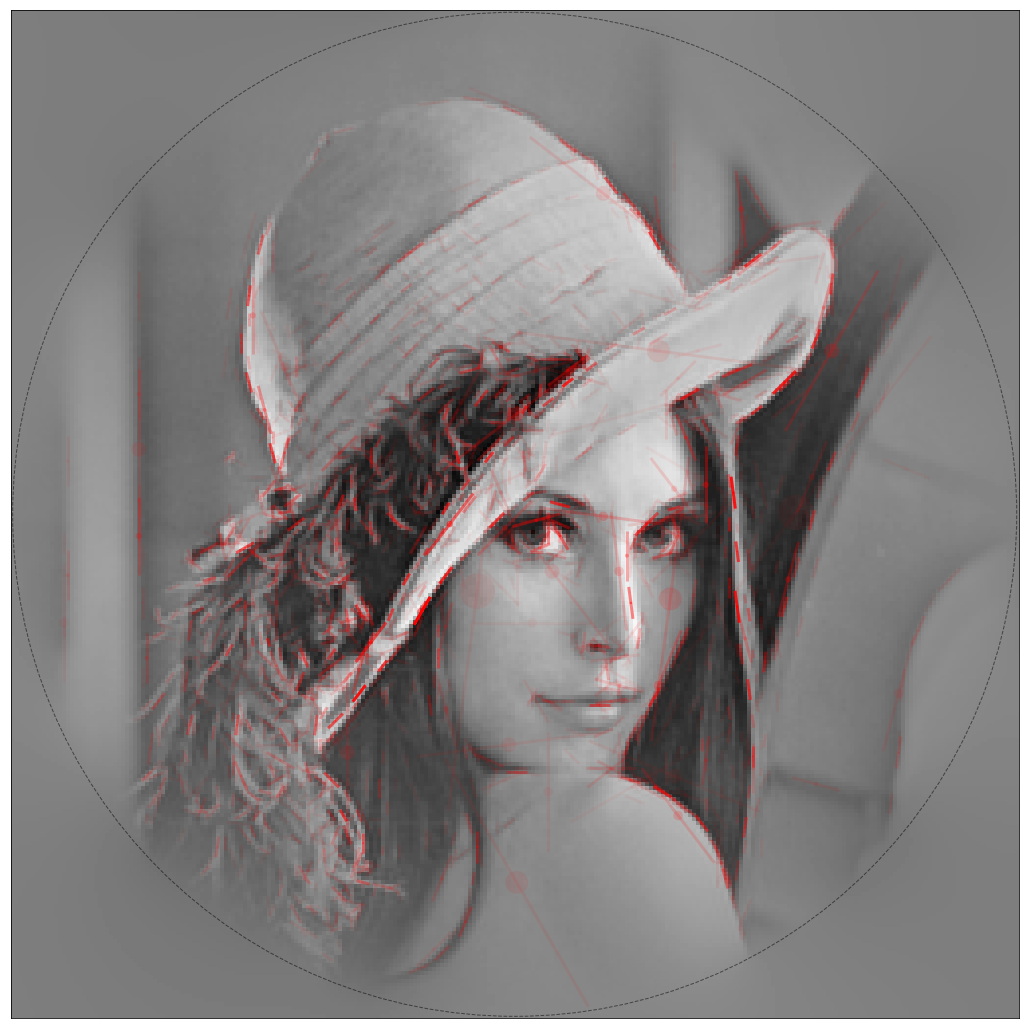

In [10]:
mp.pe.figsize_edges = 12
mp.pe.line_width = 3.
mp.pe.scale = .5

fig, a = mp.show_edges(edges, image=mp.dewhitening(white), show_phase=False, show_mask=True)

Note the dashed circle which (as in Geisler, 2001) shows the limit after which we discard edges. Indeed, when computing statistics (our main goal) we wish to be not perturbed by the fact that images are rectangular.

Let's show the results of the sparse edge extraction with the edges overlaid on the image reconstructed from the edges:

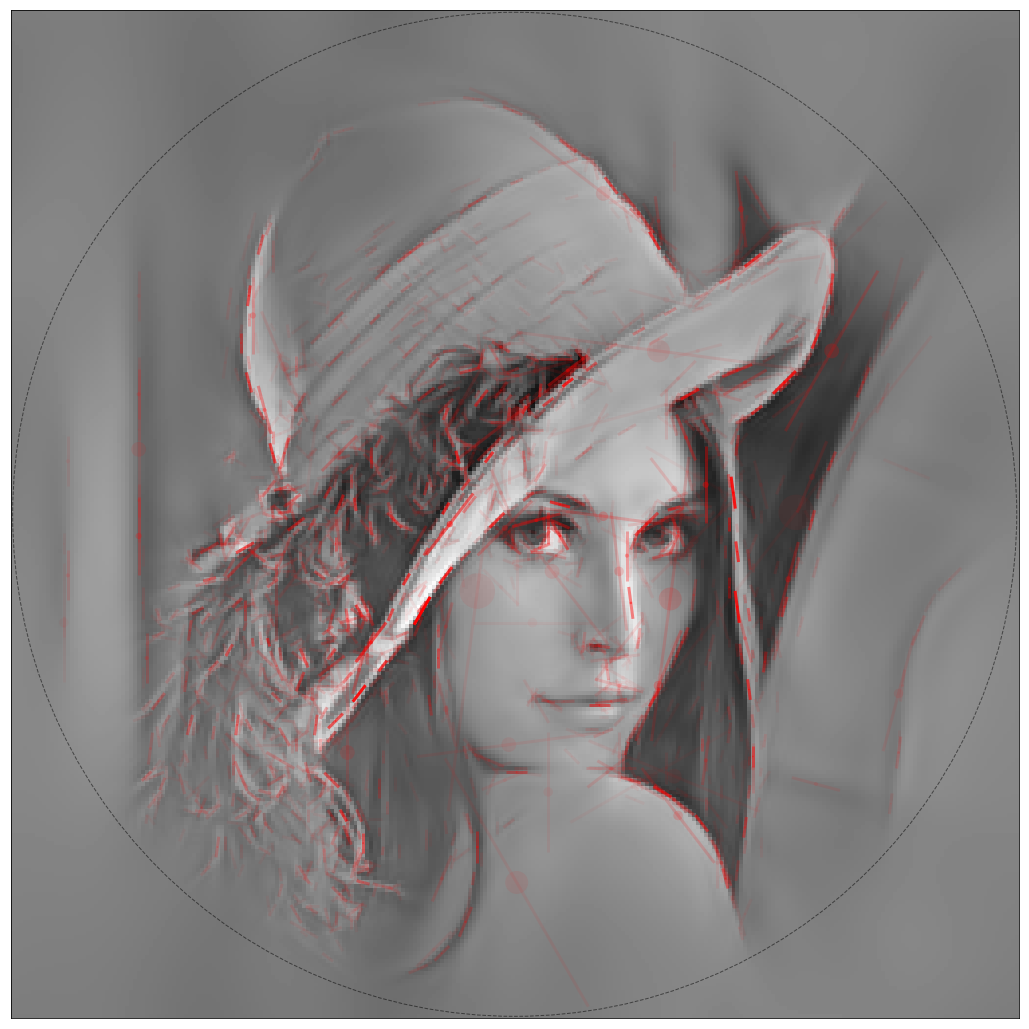

In [11]:
image_rec = mp.reconstruct(edges)        
fig, a = mp.show_edges(edges, image=mp.dewhitening(image_rec), show_phase=False, show_mask=True)


Check out [this blog post](https://laurentperrinet.github.io/sciblog/posts/2015-05-22-a-hitchhiker-guide-to-matching-pursuit.html) to learn more about Matching Pursuit.

## more examples
First, some tests are available as separate notebooks:

In [12]:
from IPython.display import FileLink, FileLinks, Image
FileLinks('../notebooks', recursive=False)

../notebooks/
  test-co-occurrences.ipynb
  test-scales.ipynb
  test-SparseEdges.ipynb
  textured-noise.ipynb
  test-parameters.ipynb
  nb_synthesis.ipynb

[Back to top](#SparseEdges)

### Effect of parameters on edge extraction: image size


In [13]:
# TODO include figure

### Effect of parameters on edge extraction: filter parameters



In [14]:
# TODO include figure

As we test different parameters for the filters, we measured the gain in efficiency for the algorithm as the ratio of the code length to achieve $85\%$ of energy extraction relative to that for the default parameters (white bar). The average is computed on the same database of natural images and error bars denote the standard deviation of gain over the database. First, we studied the effect of the bandwidth of filters respectively in the $\textsf{(A)}$ spatial frequency and $\textsf{(B)}$ orientation spaces. The minimum is reached for the default parameters: this shows that default parameters provide an optimal compromise between the precision of filters in the frequency and position domains for this database. We may also compare pyramids with different number of filters.  Indeed, efficiency (in bits) is equal to the number of selected filters times the coding cost for the address of each edge in the pyramid.
We plot here the average gain in efficiency which shows an optimal compromise respectively for respectively $\textsf{(C)}$ the number of orientations and $\textsf{(D)}$ the number of spatial frequencies (scales). Note first that with more than 12 directions, the gain remains stable. Note also that a dyadic scale ratio (that is of 2) is efficient but that other solutions ---such as using the golden section $\phi$--- prove to be significantly more efficient, though the average gain is relatively small (inferior to $5\%$).

## some book keeping for the notebook

In [15]:
%load_ext watermark
%watermark

2018-06-18T17:54:55+02:00

CPython 3.6.5
IPython 6.4.0

compiler   : GCC 4.2.1 Compatible Apple LLVM 9.1.0 (clang-902.0.39.2)
system     : Darwin
release    : 17.6.0
machine    : x86_64
processor  : i386
CPU cores  : 36
interpreter: 64bit


In [16]:
%load_ext version_information
%version_information numpy, scipy, matplotlib, sympy

Software versions
Python 3.6.5 64bit [GCC 4.2.1 Compatible Apple LLVM 9.1.0 (clang-902.0.39.2)]
IPython 6.4.0
OS Darwin 17.6.0 x86_64 i386 64bit
numpy 1.14.5
scipy 1.1.0
matplotlib 2.2.2
sympy 1.1.1
Mon Jun 18 17:54:56 2018 CEST

In [17]:
%cd -q ..